In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating path for dataset
current_dir = os.getcwd()
dataset_file = '/home/ubuntu/Downloads/realtor-data.zip.csv'


In [3]:
dataset_path = os.path.join(current_dir, dataset_file)

In [4]:
data = pd.read_csv(dataset_path)
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


### Top 5 rows in the dataset
- Where
  - status: Status of the house i.e sold or not sold
  - price: Price of the house.
  - bed: How many bed are there inside house.
  - bath: How many toilets are there inside house.
  - city: In which city, house lies.
  - street: Address of the house
  - zip_code: zip code of address
  - prev_sold_date: date of the house that are previously sold.
  


In [5]:
# Shape of the data
data.shape

print(f'Rows: {data.shape[0]} and column: {data.shape[1]}')

Rows: 2226382 and column: 12


Our dataset has 2226382 rows and 12 columns

### The rows of this dataset is more than huge. I would like to work of around 1 million rows. So, I will just drop the rest.

In [6]:
df_dropped = data.drop(data.index[:2126382]) 

In [7]:
df_dropped.shape

(100000, 12)

In [8]:
# Information of the dataset
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 2126382 to 2226381
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     99907 non-null   float64
 1   status          100000 non-null  object 
 2   price           100000 non-null  float64
 3   bed             94173 non-null   float64
 4   bath            93687 non-null   float64
 5   acre_lot        89463 non-null   float64
 6   street          99766 non-null   float64
 7   city            99995 non-null   object 
 8   state           100000 non-null  object 
 9   zip_code        100000 non-null  float64
 10  house_size      94483 non-null   float64
 11  prev_sold_date  100000 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.2+ MB


In [9]:
df_dropped['city'].value_counts().head()

city
Seattle          4175
Sacramento       3980
San Jose         3485
Portland         3460
San Francisco    2771
Name: count, dtype: int64

## let's see weather a column contains null values or not

In [10]:
df_dropped.isnull().sum()

brokered_by          93
status                0
price                 0
bed                5827
bath               6313
acre_lot          10537
street              234
city                  5
state                 0
zip_code              0
house_size         5517
prev_sold_date        0
dtype: int64

### it seems like we have lot of work to do.
- Except for status, price, state, zip_code and prev_sold_date every other column atleast contains a null values

Let's visualize the null values 

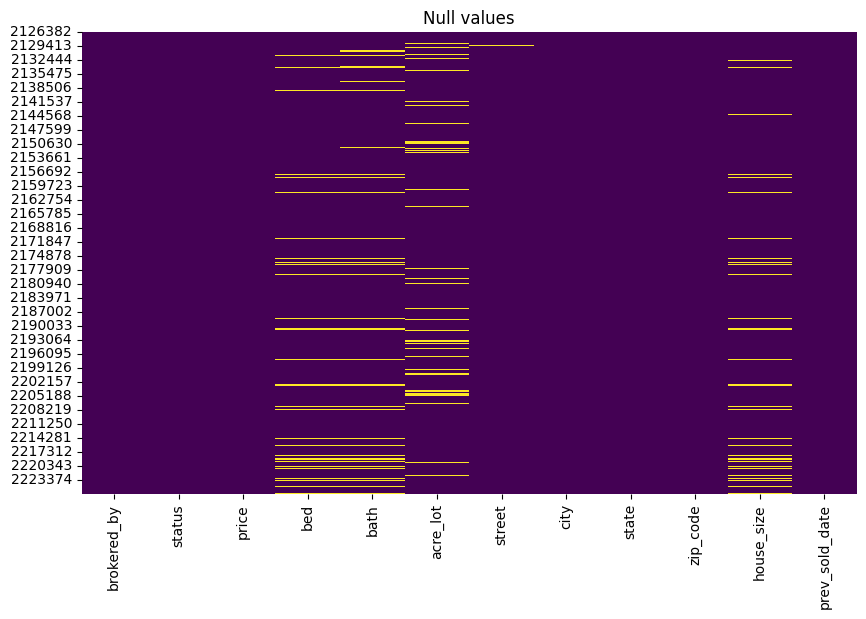

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df_dropped.isnull(),cmap='viridis', cbar=False)
plt.title('Null values')
plt.show()

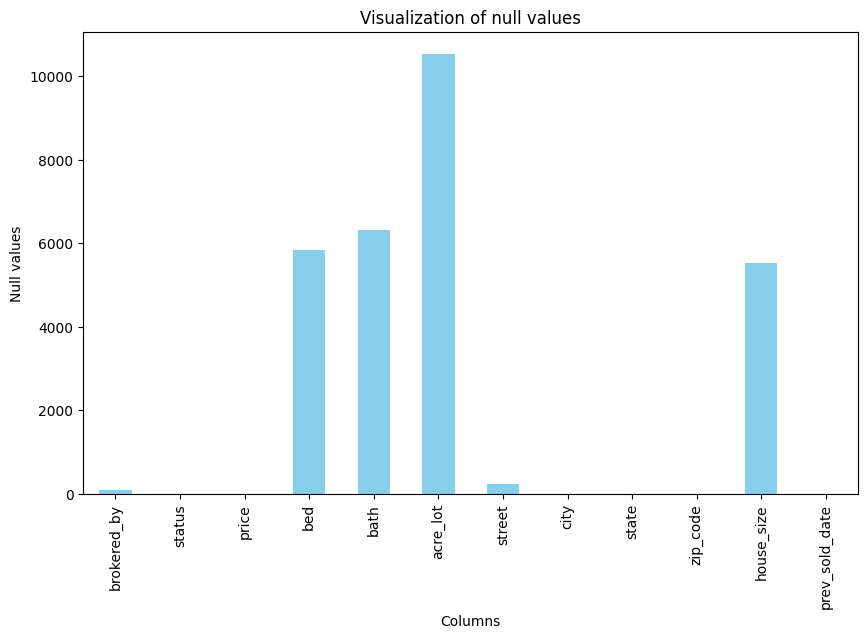

In [12]:
plt.figure(figsize=(10, 6))
df_dropped.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Visualization of null values')
plt.xlabel('Columns')
plt.ylabel('Null values')
plt.show()

As we can see there is highest null_values in acre_lot.

We need to fill all theses values in proper way to get a better prediction

Let's fill the columns that has low number of missing values.

In [13]:
cols_to_fill = ['brokered_by', 'street', 'house_size', 'bed','acre_lot', 'bath']


In [14]:
df_dropped[cols_to_fill] = df_dropped[cols_to_fill].fillna(df_dropped[cols_to_fill].median())

In [15]:
df_dropped.isnull().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              5
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

In [16]:
data.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


Lets work on prev_sold_date

In [17]:
df_dropped[['prev_sold_day', 'prev_sold_month', 'prev_sold_year']] = df_dropped['prev_sold_date'].str.split('-', expand=True)


In [18]:
df_dropped.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,prev_sold_day,prev_sold_month,prev_sold_year
2126382,53587.0,sold,1199000.0,2.0,2.0,0.17,234139.0,Menlo Park,California,94025.0,1070.0,2022-03-04,2022,03,04
2126383,90671.0,sold,5998000.0,5.0,3.0,0.21,632493.0,Palo Alto,California,94301.0,2840.0,2022-03-04,2022,03,04
2126384,47547.0,sold,588000.0,1.0,1.0,0.17,1426633.0,Sunnyvale,California,94086.0,747.0,2022-03-04,2022,03,04
2126385,72938.0,sold,258000.0,3.0,2.0,0.17,223344.0,Sunnyvale,California,94089.0,1041.0,2022-03-04,2022,03,04
2126386,16829.0,sold,898000.0,2.0,1.0,0.06,1509673.0,Redwood City,California,94063.0,820.0,2022-03-04,2022,03,04


In [19]:
# now we don't need prev_sold date column
df_dropped = df_dropped.drop('prev_sold_date', axis=1)

In [20]:
df_dropped.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_day,prev_sold_month,prev_sold_year
2126382,53587.0,sold,1199000.0,2.0,2.0,0.17,234139.0,Menlo Park,California,94025.0,1070.0,2022,03,04
2126383,90671.0,sold,5998000.0,5.0,3.0,0.21,632493.0,Palo Alto,California,94301.0,2840.0,2022,03,04
2126384,47547.0,sold,588000.0,1.0,1.0,0.17,1426633.0,Sunnyvale,California,94086.0,747.0,2022,03,04
2126385,72938.0,sold,258000.0,3.0,2.0,0.17,223344.0,Sunnyvale,California,94089.0,1041.0,2022,03,04
2126386,16829.0,sold,898000.0,2.0,1.0,0.06,1509673.0,Redwood City,California,94063.0,820.0,2022,03,04


Let's drop the datasets that contains large missing values 

In [21]:
df_dropped.dropna(inplace=True)


In [22]:
df_dropped.isnull().sum()

brokered_by        0
status             0
price              0
bed                0
bath               0
acre_lot           0
street             0
city               0
state              0
zip_code           0
house_size         0
prev_sold_day      0
prev_sold_month    0
prev_sold_year     0
dtype: int64

In [23]:
df_dropped.shape

(99995, 14)

In [24]:
df_dropped.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_day,prev_sold_month,prev_sold_year
2126382,53587.0,sold,1199000.0,2.0,2.0,0.17,234139.0,Menlo Park,California,94025.0,1070.0,2022,03,04
2126383,90671.0,sold,5998000.0,5.0,3.0,0.21,632493.0,Palo Alto,California,94301.0,2840.0,2022,03,04
2126384,47547.0,sold,588000.0,1.0,1.0,0.17,1426633.0,Sunnyvale,California,94086.0,747.0,2022,03,04
2126385,72938.0,sold,258000.0,3.0,2.0,0.17,223344.0,Sunnyvale,California,94089.0,1041.0,2022,03,04
2126386,16829.0,sold,898000.0,2.0,1.0,0.06,1509673.0,Redwood City,California,94063.0,820.0,2022,03,04


In [25]:
# Lets see the types of our dataframe
df_dropped.dtypes

brokered_by        float64
status              object
price              float64
bed                float64
bath               float64
acre_lot           float64
street             float64
city                object
state               object
zip_code           float64
house_size         float64
prev_sold_day       object
prev_sold_month     object
prev_sold_year      object
dtype: object

<Axes: xlabel='state'>

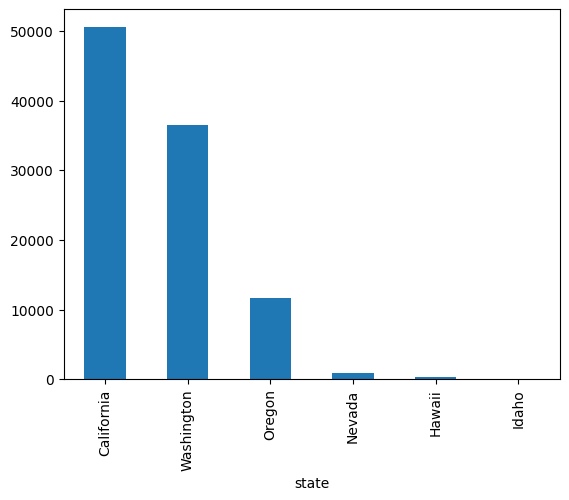

In [26]:
df_dropped['state'].value_counts().plot(kind='bar')

<Axes: >

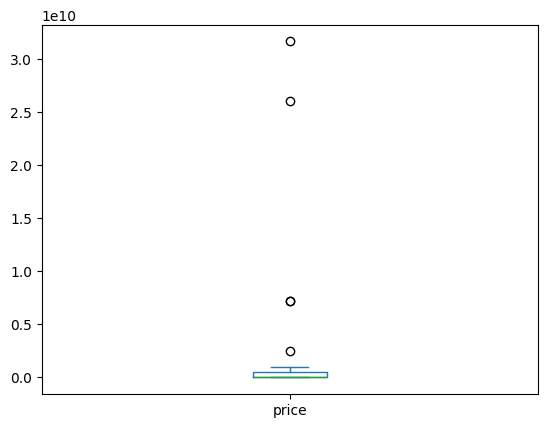

In [27]:
sum_bath = df_dropped.groupby('bath')['price'].sum().plot(kind='box')
sum_bath

In [28]:
df_dropped['status'].value_counts()

status
sold    99995
Name: count, dtype: int64

In [29]:
def univariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    # Get value counts
    value_counts = data[xlabel].value_counts()
    ax = value_counts.plot.bar(
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    total = value_counts.sum()
    # Add percentage label for each plot
    for plot in ax.patches:
        height = plot.get_height()
        ax.annotate(
            # Percentage label text
            f"{height / total * 100:.1f}%",
            xy=(
                # Percentage label x co-ordinate
                plot.get_x() + plot.get_width() / 2.,
                # Percentage label y co-ordinate
                height,
            ),
            # Percentage label horizontal align
            ha="center",

        )

    ax.set_title(f"Distribution of {xlabel} in the dataset", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

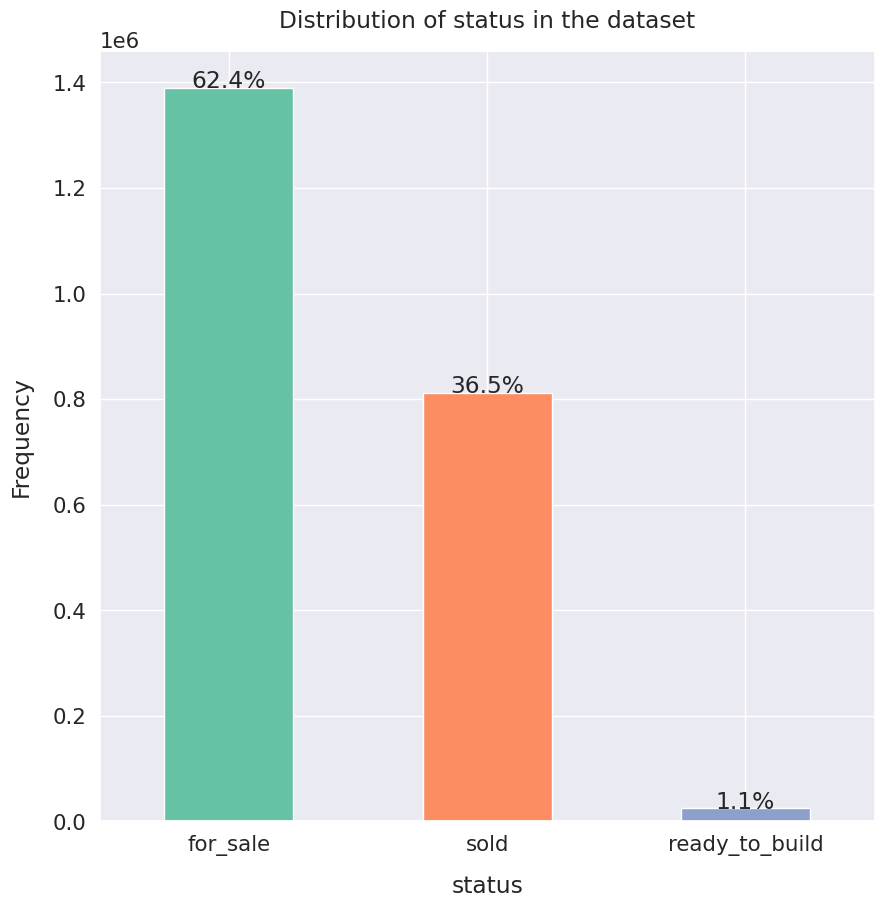

In [30]:
univariate_barplot(data, 'status')

In [31]:
# numerical_columns 
numerical_features = ['bath', 'bed', 'acre_lot', 'brokered_by', 'street', 'zip_code', 'house_size']



In [32]:
# # Set the aesthetic style of the plots
# sns.set_style('whitegrid')

# # Create histograms for the numerical columns
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
# plt.suptitle('Histogram plot for numbrical features', fontsize = 16)


# for i, column in enumerate(numerical_features):
#     sns.histplot(data[column], kde=True, ax = axes[i//2, i%2])
#     axes[i//2, i%2].set_title(column)
#     axes[i//2, i%2].set_xlabel('')
#     axes[i//2, i%2].set_ylabel('')

# plt.tight_layour(rect=[0,0.03,1,0.95])
# plt.show()


lets work on categorical features and numerical features



In [33]:
data['bath'].value_counts()

bath
2.0      746294
3.0      471821
1.0      260131
4.0      157290
5.0       45563
          ...  
460.0         1
163.0         1
752.0         1
80.0          1
55.0          1
Name: count, Length: 86, dtype: int64

In [34]:
data['bed'].value_counts()

bed
3.0      753923
4.0      440566
2.0      311019
5.0      120637
1.0       65098
          ...  
110.0         1
82.0          1
69.0          1
102.0         1
120.0         1
Name: count, Length: 99, dtype: int64

In [35]:
data['acre_lot'].value_counts()

acre_lot
0.17       66180
0.14       65258
0.16       55864
0.23       55742
0.15       52191
           ...  
99.18          1
273.50         1
2190.80        1
415.65         1
1650.72        1
Name: count, Length: 16057, dtype: int64

### lets visualize with scatter plot

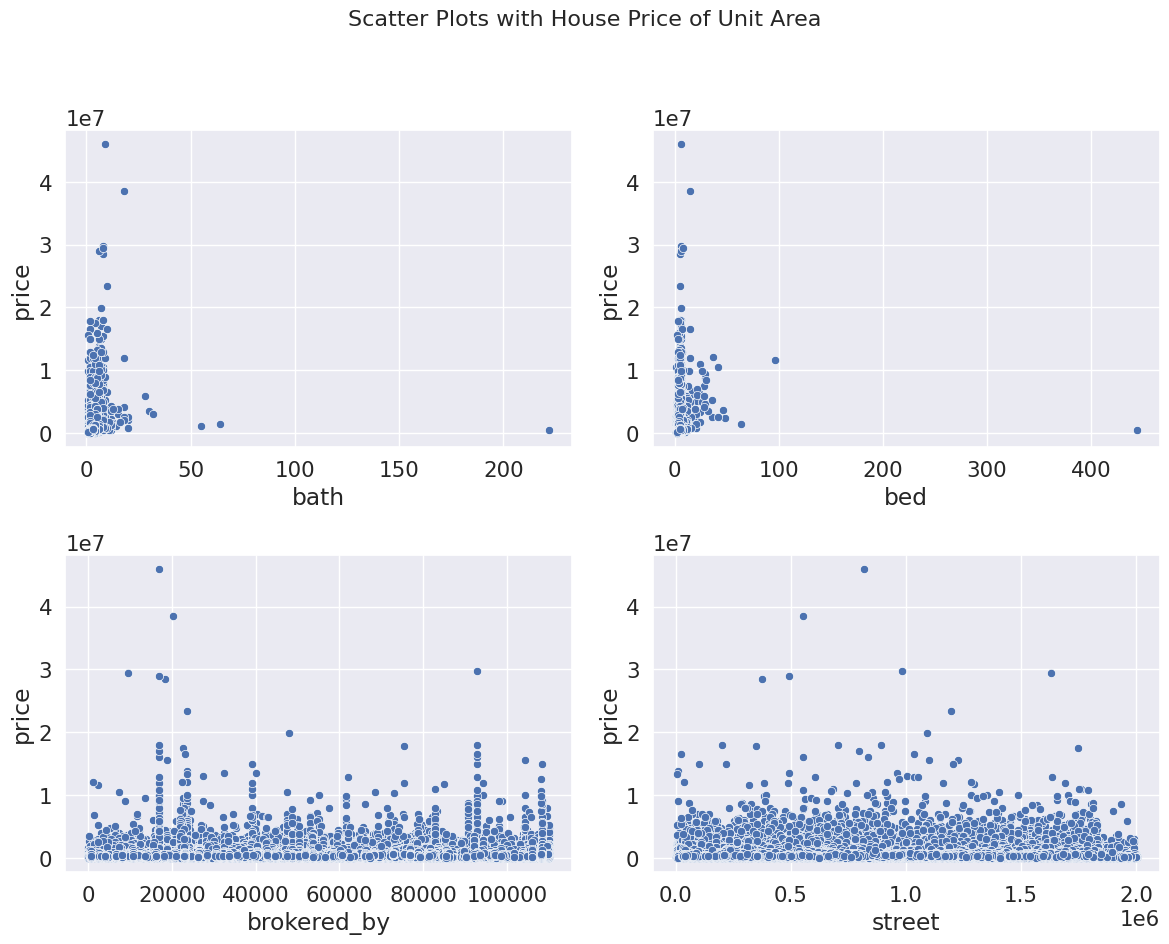

In [40]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=df_dropped, x='bath', y='price', ax=axes[0, 0])
sns.scatterplot(data=df_dropped, x='bed', y='price', ax=axes[0, 1])
sns.scatterplot(data=df_dropped, x='brokered_by', y='price', ax=axes[1, 0])
sns.scatterplot(data=df_dropped, x='street', y='price', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### lets visualize with scatter plot

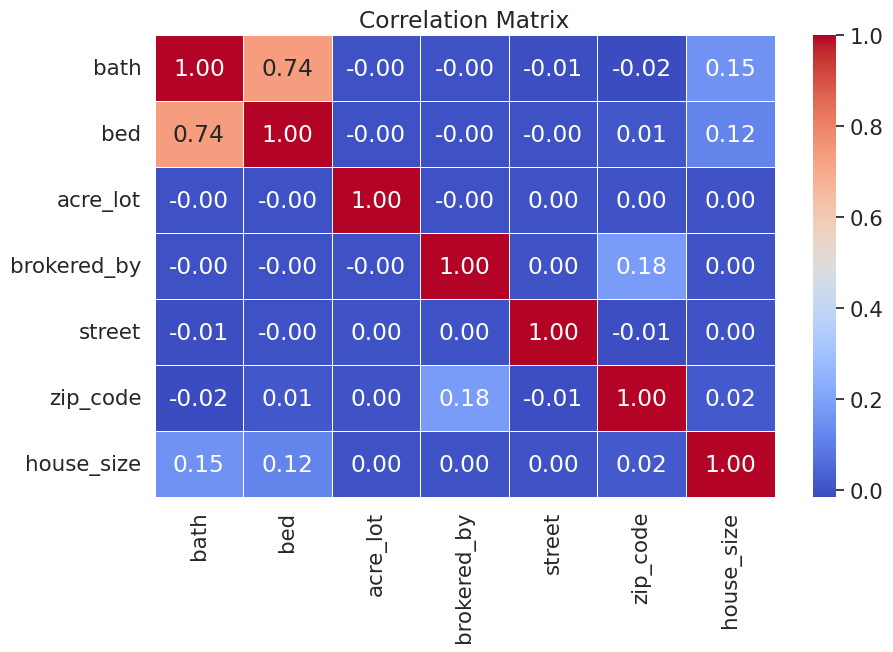

                 bath       bed  acre_lot  brokered_by    street  zip_code  \
bath         1.000000  0.736974 -0.002876    -0.001734 -0.010224 -0.015811   
bed          0.736974  1.000000 -0.001260    -0.003083 -0.002152  0.008095   
acre_lot    -0.002876 -0.001260  1.000000    -0.000643  0.001481  0.002846   
brokered_by -0.001734 -0.003083 -0.000643     1.000000  0.001200  0.182141   
street      -0.010224 -0.002152  0.001481     0.001200  1.000000 -0.010156   
zip_code    -0.015811  0.008095  0.002846     0.182141 -0.010156  1.000000   
house_size   0.153793  0.118157  0.000709     0.003587  0.001366  0.018086   

             house_size  
bath           0.153793  
bed            0.118157  
acre_lot       0.000709  
brokered_by    0.003587  
street         0.001366  
zip_code       0.018086  
house_size     1.000000  


In [42]:
# Correlation matrix
correlation_matrix = df_dropped[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [38]:
df_dropped.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_day,prev_sold_month,prev_sold_year
2126382,53587.0,sold,1199000.0,2.0,2.0,0.17,234139.0,Menlo Park,California,94025.0,1070.0,2022,03,04
2126383,90671.0,sold,5998000.0,5.0,3.0,0.21,632493.0,Palo Alto,California,94301.0,2840.0,2022,03,04
2126384,47547.0,sold,588000.0,1.0,1.0,0.17,1426633.0,Sunnyvale,California,94086.0,747.0,2022,03,04
2126385,72938.0,sold,258000.0,3.0,2.0,0.17,223344.0,Sunnyvale,California,94089.0,1041.0,2022,03,04
2126386,16829.0,sold,898000.0,2.0,1.0,0.06,1509673.0,Redwood City,California,94063.0,820.0,2022,03,04


In [36]:
# categorical
categorical = ['state', 'status', 'city']


In [37]:
# numerical 
numerical_features = ['bath', 'bed', 'acre_lot', 'brokered_by', 'street', 'zip_code', 'house_size']